In [1]:
#importing modules

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mtp
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#reading the datasets
#AP_data = pd.read_csv('Admission_Predict.csv', engine='python', encoding='utf-8', error_bad_lines=False)
#len(AP_data)
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7s9O2kaNkVoIcGkwGtr_5appHHvKEnZjiL_4J9oInnEp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-dkictjfkiqa1mi'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

AP_data = pd.read_csv(body)
AP_data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preprocessing

In [3]:
#handling missing values
AP_data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

## Data Preprocessing

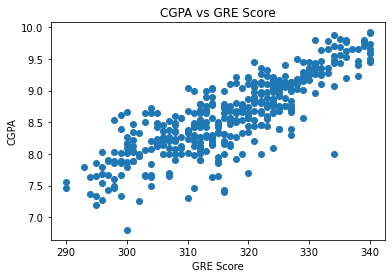

In [4]:
plt.scatter(AP_data['GRE Score'],AP_data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

Skewness of chance of admit :  -0.3534480999327828


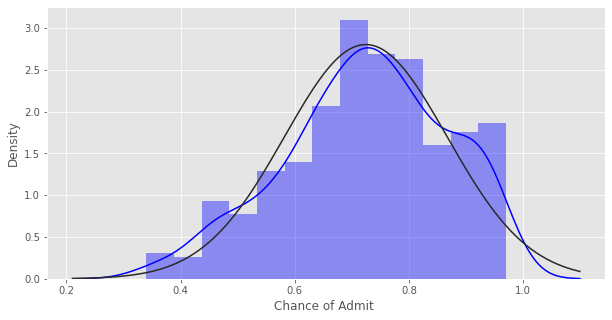

In [5]:
#Data Visualization
plt.style.use('ggplot')
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
# lets see the distribution for the target variable
print('Skewness of chance of admit : ',AP_data['Chance of Admit '].skew())
plt.figure(figsize = (10,5))
sns.distplot(AP_data['Chance of Admit '],kde = True,color = 'b',fit = stats.norm)
plt.show()

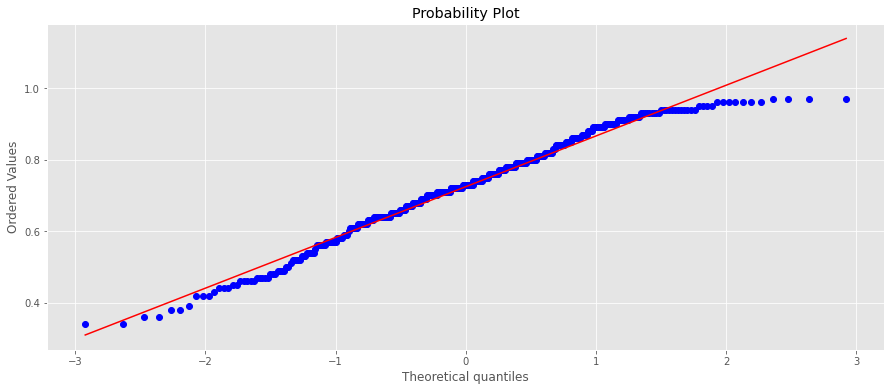

In [6]:
fig, ax = plt.subplots(figsize=(15,6))
rs = stats.probplot(AP_data['Chance of Admit '],plot = ax)
plt.show()

array([[<AxesSubplot:title={'center':'Serial No.'}>,
        <AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>],
       [<AxesSubplot:title={'center':'University Rating'}>,
        <AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>],
       [<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

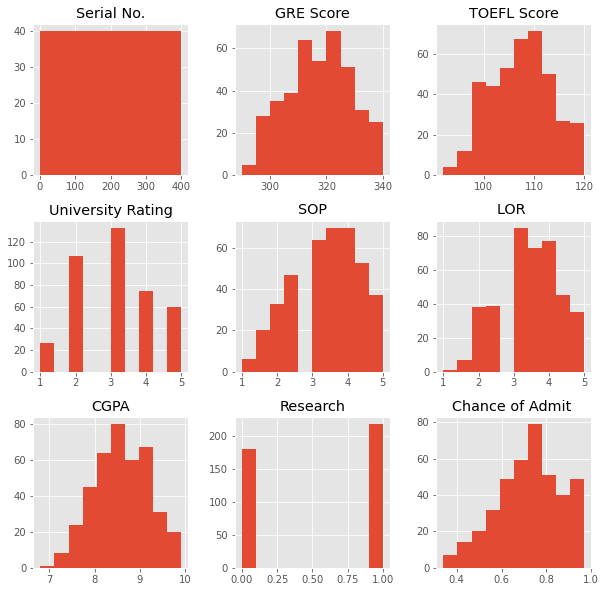

In [9]:
AP_data.hist(figsize=(10,10))

## Splitting dependant and independant data

In [7]:
#Splitting dependant and independant data
x = AP_data.iloc[:,1:8].values
#x

In [8]:
y = AP_data.iloc[:,8:].values
#y

In [9]:
x.shape


(400, 7)

In [10]:
y.shape

(400, 1)

In [11]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Training the model

In [42]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=250, max_features=(2/7), min_samples_split=5, n_jobs=2, random_state=1005)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [43]:
y_pred

array([0.70105684, 0.67184665, 0.76163262, 0.66588328, 0.72472816,
       0.63331807, 0.70613469, 0.68496508, 0.88061008, 0.91908182,
       0.54090739, 0.91167332, 0.68931732, 0.48087851, 0.84406468,
       0.67370165, 0.64487029, 0.8040776 , 0.60157481, 0.73509095,
       0.86121116, 0.83799037, 0.63560658, 0.45465884, 0.81386505,
       0.59836422, 0.44629737, 0.68922872, 0.89494662, 0.66884657,
       0.63869414, 0.72078931, 0.75399105, 0.56979984, 0.75655866,
       0.75681086, 0.64567798, 0.87950653, 0.62560606, 0.93034702,
       0.73082763, 0.67884238, 0.73278597, 0.80404598, 0.80568957,
       0.64568476, 0.6002076 , 0.69896424, 0.63029758, 0.59578723,
       0.68667274, 0.77706681, 0.64258886, 0.88729557, 0.7187593 ,
       0.7358163 , 0.7571019 , 0.74327638, 0.75929121, 0.85389373,
       0.75419251, 0.47881382, 0.64708093, 0.51504305, 0.84012263,
       0.83230075, 0.72112319, 0.90538546, 0.72183151, 0.74362577,
       0.60593951, 0.83320754, 0.81389509, 0.63543276, 0.90798

In [44]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0480915158189033
Mean Squared Error: 0.004984720356761729
Root Mean Squared Error: 0.070602552055586


In [15]:
#admit_chance_pred = pd.DataFrame({'Actual_value':y_test, 'Predicted_value_using_r': y_pred})
#admit_chance_pred.head()
#print(admit_chance_pred[:5])

In [45]:
prediction = regressor.predict(x_test)
print("ORIGINAL DATA")
print(y_test[0:5])
print()
print("PREDICTED DATA")
#print(y_test)
#print(prediction)
#len(y_train)
print(y_pred[0:5])

ORIGINAL DATA
[[0.71]
 [0.7 ]
 [0.79]
 [0.73]
 [0.72]]

PREDICTED DATA
[0.70105684 0.67184665 0.76163262 0.66588328 0.72472816]


In [46]:
import joblib
joblib.dump(regressor, 'model.pkl')

['model.pkl']

## IBM CLoud

In [47]:
!pip install ibm_watson_machine_learning

In [48]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "apikey":"9VKQnZyBF_q8bkmUKuLvO-vN-duJcPi7X8-AX-2J1Rtc",
    "url":"https://us-south.ml.cloud.ibm.com"
}

wml_client = APIClient(wml_credentials)

In [49]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
706c0d05-24d0-411e-9548-3f28d201779e  models  2022-11-17T13:26:09.966Z
------------------------------------  ------  ------------------------


In [50]:
def guid_from_space_name(wml_client, space_name):
    space = wml_client.spaces.get_details()
    idr = []
    for i in space['resources']:
        idr.append(i['metadata']['id'])
    return idr   

In [51]:
space_uid = guid_from_space_name(wml_client, "models")
print("Space id: ",space_uid)

Space id:  ['706c0d05-24d0-411e-9548-3f28d201779e']


In [52]:
wml_client.set.default_space(space_uid[0])

'SUCCESS'

In [53]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

# Model

In [54]:
import sklearn
sklearn.__version__

'1.0.2'

In [55]:
import pickle
pickle.dump(regressor, open("university.pkl", "wb"))

In [56]:
import pickle
#logistic regression model
LRM = pickle.load(open("university.pkl", "rb")) 

In [57]:
MODEL_NAME = 'university'
DEPLOYMENT_NAME = 'uni'
DEMO_MODEL = LRM

In [58]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')


In [59]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0 ',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [60]:
model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train 
)
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T13:46:51.049Z',
  'id': 'b35a51ff-b50d-4ec7-bfa4-768d33c7d63b',
  'modified_at': '2022-11-18T13:46:54.605Z',
  'name': 'university',
  'owner': 'IBMid-66400452SA',
  'resource_key': '5906e5c2-603d-4a90-850d-385620c55911',
  'space_id': '706c0d05-24d0-411e-9548-3f28d201779e'},
 'system': {'warnings': []}}

In [61]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'b35a51ff-b50d-4ec7-bfa4-768d33c7d63b'

In [62]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}


In [63]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid = model_id, 
    meta_props = deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'b35a51ff-b50d-4ec7-bfa4-768d33c7d63b' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3d1a9159-8ae8-41b8-8f35-e7cf4b5eeb46'
------------------------------------------------------------------------------------------------


